# Handling non-linear data

In this lab, you will explore a few data sets where the dependent and independent variables aren't quite linearly related.

In [3]:
%matplotlib inline

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

## Saturation-style data

In [12]:
# The file themepark.csv has some data from a theme park. Children were asked to rate their experience on a scale
# from 0-5. This data was compared against the number of hours they spent in the park.
# Create a pandas DataFrame from this data.
park = pandas.read_csv('themepark.csv')
park

,Hours,Enjoyment
0,1,1
1,2,3
2,3,4
3,4,5
4,5,5
5,1,0
6,1,1
7,1,0
8,1,3
9,1,2


In [13]:
# Have a look at the data (e.g. display the head or tail, use describe, etc.)
park.head()

,Hours,Enjoyment
0,1,1
1,2,3
2,3,4
3,4,5
4,5,5


In [14]:
park.tail()

,Hours,Enjoyment
22,4,5
23,5,5
24,5,5
25,5,5
26,5,4


In [15]:
park.describe()

,Hours,Enjoyment
count,27.000000,27.000000
mean,2.740741,3.148148
std,1.456883,1.610153
min,1.000000,0.000000
25%,1.500000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.500000
max,5.000000,5.000000


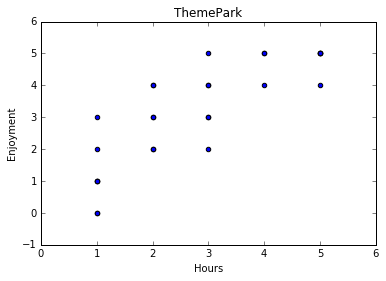

In [26]:
# Draw a scatterplot of this data.
plt.scatter(park.Hours,park.Enjoyment)
plt.xlabel('Hours')
plt.ylabel('Enjoyment')
plt.title('ThemePark')

In [55]:
# Try doing a linear regression on this data
l = sklearn.linear_model.LinearRegression()
l.fit(park[["Hours"]], park.Enjoyment)
l.coef_

array([ 0.90671141])

[(1, 1.5697986577181209),
 (2, 2.476510067114094),
 (3, 3.3832214765100672),
 (4, 4.2899328859060404),
 (5, 5.1966442953020131),
 (1, 1.5697986577181209),
 (1, 1.5697986577181209),
 (1, 1.5697986577181209),
 (1, 1.5697986577181209),
 (1, 1.5697986577181209),
 (1, 1.5697986577181209),
 (2, 2.476510067114094),
 (2, 2.476510067114094),
 (2, 2.476510067114094),
 (2, 2.476510067114094),
 (2, 2.476510067114094),
 (3, 3.3832214765100672),
 (3, 3.3832214765100672),
 (3, 3.3832214765100672),
 (3, 3.3832214765100672),
 (3, 3.3832214765100672),
 (4, 4.2899328859060404),
 (4, 4.2899328859060404),
 (5, 5.1966442953020131),
 (5, 5.1966442953020131),
 (5, 5.1966442953020131),
 (5, 5.1966442953020131)]

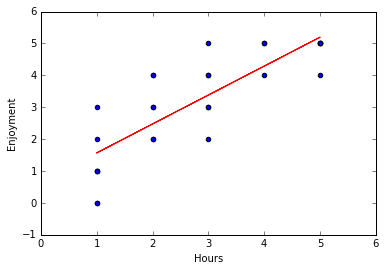

In [56]:
# Plot this regression over the top of the data. Could the regression be better?
l = sklearn.linear_model.LinearRegression()
l.fit(park[["Hours"]], park.Enjoyment)
predictions = l.predict(park[["Hours"]])
matplotlib.pyplot.scatter(park.Hours, park.Enjoyment)
matplotlib.pyplot.plot(park.Hours, predictions, color="red")
plt.xlabel('Hours')
plt.ylabel('Enjoyment')
zip(park.Hours, predictions)

In [49]:
# Import the python math library so that we can use the function math.log
import math


In [50]:
# The series called "Hours" inside your dataframe has a method called .map() which will apply a function 
# to every element in the series. e.g. df.Hours.map(math.log)
# Use this to add an extra column to your data frame called "LogHours"
park['LogHours'] = park.Hours.map(math.log)
park

,Hours,Enjoyment,LogHours
0,1,1,0.000000
1,2,3,0.693147
2,3,4,1.098612
3,4,5,1.386294
4,5,5,1.609438
5,1,0,0.000000
6,1,1,0.000000
7,1,0,0.000000
8,1,3,0.000000
9,1,2,0.000000


In [51]:
# Try a linear regression of Enjoyment against LogHours
l = sklearn.linear_model.LinearRegression()
l.fit(park[["LogHours"]], park.Enjoyment)
l.coef_

array([ 2.28599658])

In [48]:
# Use your regressors' predict method to predict some Y values based on LogHours
l.predict([[5]])

array([ 12.63447266])

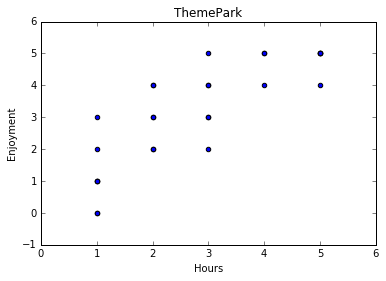

In [57]:
# Create a scatter plot of the original data (i.e. just copy and paste the scatterplot you did before). Overlay
# it with a plot of the new predictions you made (as the y-values) against Hours (not LogHours). This overlay plot
# won't be straight -- it will sag a little on the right.
plt.scatter(park.Hours,park.Enjoyment)
plt.xlabel('Hours')
plt.ylabel('Enjoyment')
plt.title('ThemePark')

# Piece-wise linear data

In [63]:
# windpower.csv shows the total amount of wind power generation capacity in various countries between 2006 and 2015
# The country name is in the first column (and makes a good index); the data is TAB separated, so use sep='\t' as an
# argument when you read it in.
windpower = pandas.read_csv('windpower.csv',delimiter='\t',index_col=0)
windpower

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,2599.0,5912.0,12210.0,25104.0,44733.000,62733.0,75564.0,91412.0,114763.0,145104.0
Brazil,237.0,247.0,339.0,606.0,932.000,1509.0,2508.0,3466.0,5939.0,8715.0
Sweden,571.0,831.0,1067.0,1560.0,2163.000,2970.0,3745.0,4382.0,5425.0,6025.0
Poland,153.0,276.0,472.0,725.0,1107.000,1616.0,2497.0,3390.0,3834.0,5100.0
Portugal,1716.0,2130.0,2862.0,3535.0,3702.000,4083.0,4525.0,4730.0,4914.0,5079.0
Denmark,3140.0,3129.0,3164.0,3465.0,3752.000,3871.0,4162.0,4807.0,4845.0,5063.0
Turkey,65.0,207.0,433.0,801.0,1329.000,1799.0,2312.0,2958.0,3763.0,4718.0
Australia,651.0,824.0,1306.0,1712.0,1991.000,2176.0,2584.0,3239.0,3806.0,4187.0
Netherlands,1571.0,1759.0,2237.0,2223.0,2237.000,2328.0,2391.0,2671.0,2805.0,3431.0
Mexico,84.0,85.0,85.0,520.0,733.000,873.0,1370.0,1859.0,2551.0,3073.0


In [75]:
windpower.T

,China,Brazil,Sweden,Poland,Portugal,Denmark,Turkey,Australia,Netherlands,Mexico,...,Sri Lanka,Latvia,Luxembourg,Mongolia,United Kingdom,Venezuela,Cape Verde,Canada,France,Italy
2006,2599.0,237.0,571.0,153.0,1716.0,3140.0,65.0,651.0,1571.0,84.0,...,NaN,NaN,NaN,NaN,1963.0,NaN,NaN,1460.0,1589.0,2123.0
2007,5912.0,247.0,831.0,276.0,2130.0,3129.0,207.0,824.0,1759.0,85.0,...,NaN,NaN,NaN,NaN,2389.0,NaN,NaN,1846.0,2477.0,2726.0
2008,12210.0,339.0,1067.0,472.0,2862.0,3164.0,433.0,1306.0,2237.0,85.0,...,NaN,NaN,NaN,NaN,3288.0,NaN,NaN,2369.0,3426.0,3537.0
2009,25104.0,606.0,1560.0,725.0,3535.0,3465.0,801.0,1712.0,2223.0,520.0,...,NaN,NaN,NaN,NaN,4070.0,NaN,NaN,3319.0,4410.0,4850.0
2010,44733.0,932.0,2163.0,1107.0,3702.0,3752.0,1329.0,1991.0,2237.0,733.0,...,NaN,NaN,NaN,NaN,5203.0,NaN,NaN,4008.0,5660.0,5797.0
2011,62733.0,1509.0,2970.0,1616.0,4083.0,3871.0,1799.0,2176.0,2328.0,873.0,...,NaN,NaN,NaN,NaN,6540.0,NaN,24.0,5265.0,6800.0,6747.0
2012,75564.0,2508.0,3745.0,2497.0,4525.0,4162.0,2312.0,2584.0,2391.0,1370.0,...,63.0,NaN,NaN,NaN,8445.0,30.0,24.0,6200.0,7196.0,8144.0
2013,91412.0,3466.0,4382.0,3390.0,4730.0,4807.0,2958.0,3239.0,2671.0,1859.0,...,63.0,NaN,NaN,50.0,10711.0,NaN,24.0,7823.0,8243.0,8558.0
2014,114763.0,5939.0,5425.0,3834.0,4914.0,4845.0,3763.0,3806.0,2805.0,2551.0,...,NaN,62.0,58.0,NaN,12440.0,NaN,24.0,9694.0,9285.0,8663.0
2015,145104.0,8715.0,6025.0,5100.0,5079.0,5063.0,4718.0,4187.0,3431.0,3073.0,...,NaN,62.0,58.0,NaN,13603.0,NaN,NaN,11205.0,10358.0,8958.0


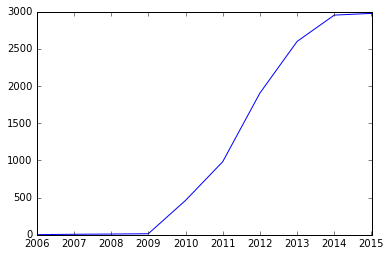

In [65]:
# Plot the wind power generation capacity in Romania
windpower.loc['Romania'].plot()

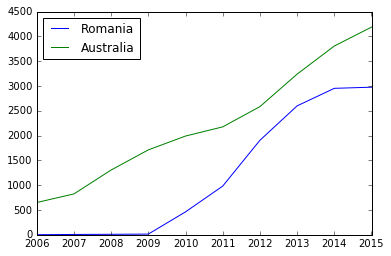

In [67]:
windpower.T[['Romania','Australia']].plot()

In [78]:
# Try regressing the Romanian data for the whole period.
romania = pandas.DataFrame({
        'year':windpower.T.index.astype(int),
        'power':windpower.T.Romania
    })
ols = sklearn.linear_model.LinearRegression()
ols.fit(romania[['year']],romania.power)
ols.score(romania[['year']],romania.power)

0.89684379471573805

In [80]:
import matplotlib.pyplot
predictions = ols.predict(romania[['year']]
matplotlib.pyplot.scatter(romania.year,romania.power)         
matplotlib.pyplot.plot(romania.year,predictions,color='red')
predictions

SyntaxError: invalid syntax (<ipython-input-80-2a9a52aaec8a>, line 3)

In [69]:
# Try for just 2009 - 2014.
modern_romania = romania[romania.year>=2009]
ols.fit(modern_romania[['year']],modern_romania.power)
ols.score(modern_romania[['year']],modern_romania.power)

0.89684379471573805

# Other non-linear data

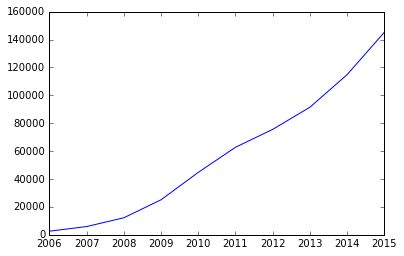

In [81]:
# Plot the wind power generation capacity in China. What do you think you might need to do to the data 
windpower.T.China.plot()

In [85]:
# Does the Facebook share price show a linear trend, or a faster-than-linear trend? 
# The timeframe from October 2014 to March 2016 is perhaps the clearest.
# If you have time, try to find an effective regression on this data.
import datetime
facebook = pandas.read_csv('facebook-share-price.csv', sep=',', parse_dates=['Date'], index_col='Date')
facebook

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-06-17,114.419998,114.430000,112.559998,113.019997,24383100,113.019997
2016-06-16,113.870003,114.500000,112.940002,114.389999,19196100,114.389999
2016-06-15,115.300003,115.440002,114.070000,114.599998,19819400,114.599998
2016-06-14,114.070000,114.949997,113.580002,114.940002,17618500,114.940002
2016-06-13,115.000000,115.480003,113.309998,113.949997,31718200,113.949997
2016-06-10,117.540001,118.110001,116.260002,116.620003,18510800,116.620003
2016-06-09,118.129997,118.680000,117.709999,118.559998,13859200,118.559998
2016-06-08,117.760002,118.599998,117.269997,118.389999,14505600,118.389999
2016-06-07,119.239998,119.300003,117.669998,117.760002,17103000,117.760002


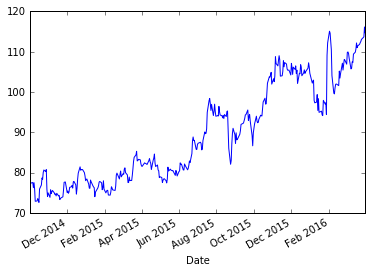

In [87]:
import datetime
facebook.Close[(facebook.index>datetime.datetime(2014,10,1)) & (facebook.index<datetime.datetime(2016,3,31))].plot()

In [88]:
share_values = facebook.Close[(facebook.index>datetime.datetime(2014,10,1)) & 
                              (facebook.index<datetime.datetime(2016,3,31))].values

In [89]:
number_of_days = len(share_values)

In [ ]:
facebook_dataframe = pandas.DataFrame